In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from numpy import log
from pandas import Series
from datetime import datetime 

In [15]:
df= pd.read_csv('AirTemp.csv',encoding='unicode_escape')
df.head()

,Year,Month,AvgTemp
0,1920,Jan,40.6
1,1920,Feb,40.8
2,1920,Mar,44.4
3,1920,Apr,46.7
4,1920,May,54.1


In [20]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Month']=le.fit_transform(df['Month'])
 

In [24]:
df['Date'] = df['Year'].astype(str) +"-"+ df['Month']

In [25]:
df.head()

,Year,Month,AvgTemp,Date
0,1920,Jan,40.6,1920-Jan
1,1920,Feb,40.8,1920-Feb
2,1920,Mar,44.4,1920-Mar
3,1920,Apr,46.7,1920-Apr
4,1920,May,54.1,1920-May


In [27]:
df=df.drop(['Year','Month'],axis=1)
df.head()

,AvgTemp,Date
0,40.6,1920-Jan
1,40.8,1920-Feb
2,44.4,1920-Mar
3,46.7,1920-Apr
4,54.1,1920-May


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AvgTemp  240 non-null    float64
 1   Date     240 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   AvgTemp  240 non-null    float64       
 1   Date     240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [34]:
df.isnull().sum()

AvgTemp    0
Date       0
dtype: int64

In [35]:
df=df.set_index(['Date'])

In [36]:
df.head(1)

,AvgTemp
Date,
1920-01-01,40.6


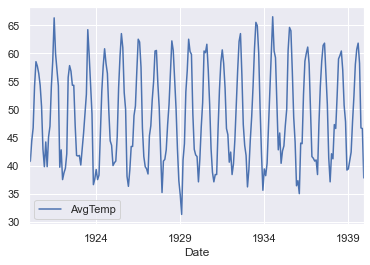

In [37]:
df.plot()
plt.show()

# Decomposition

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

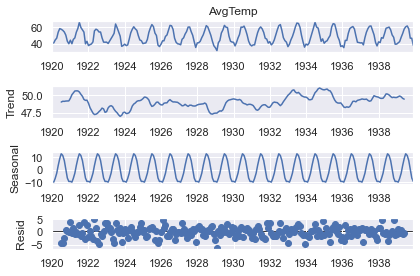

In [41]:
s_decompose = seasonal_decompose(df['AvgTemp'],model='additive')
s_decompose.plot()
plt.show()

# Durbin Watson Test - 
to check if data is fit for TSA or we can predict the same from Linear Regression also. 

In [42]:
import statsmodels.api as sm

sm.stats.durbin_watson(df['AvgTemp'])

0.01100559882089451

#### Autocorrelation Exist.

Durbin Watson test should be between 0-4 and if the value is less or more than 2...we can say that the data is shwoing self autocorrelation. This data can't be predicted by linear regression and we will have to use the tie series forecasting. 

# Stationary or Non-Stationary Dataset
(Augumented Dickey Fuller Test)

In [43]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_check(dataset):
    labels=['ADF Stats Test','p-value','# of Lags','# of Observations']
    result=adfuller(dataset)
    
    for i, j in zip(labels,result):
        print(i +' : ' +str(j))
        
    if result[1] <= 0.05:
        print("Strong Evidence against Null Hypothesis - TS is STATIONARY")  ## p-value low, Ho go.
    else:
        print("Weak Evidence against Null Hypothesis - TS is NON-STATIONARY")
        
        
adf_check(df)

ADF Stats Test : -3.2554924030863357
p-value : 0.016989030222608642
# of Lags : 14
# of Observations : 225
Strong Evidence against Null Hypothesis - TS is STATIONARY


if the result is stationary then --- d = D =0

Trend - p= ? d= 0 q=?

Seasonality - P= ? D= 0 Q=?

#  p and q value

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

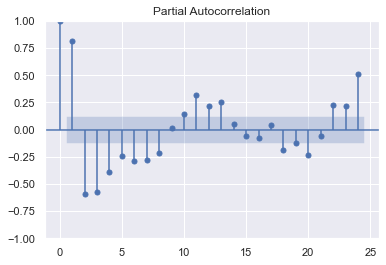

In [50]:
plot_pacf(df['AvgTemp'])
plt.show()

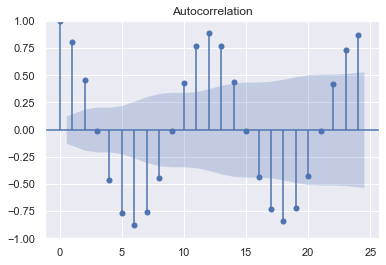

In [51]:
plot_acf(df['AvgTemp'])
plt.show()

Trend - p=9  d= 0 q=2

Seasonality - P= 9 D= 0 Q=2

# ARIMA MODEL

In [52]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [57]:
model = sm.tsa.statespace.SARIMAX(df['AvgTemp'],order=(9, 0, 2),seasonal_order=(9,0,2,12))
result = model.fit()
result.summary()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            AvgTemp   No. Observations:                  240
Model:             SARIMAX(9, 0, 2)x(9, 0, 2, 12)   Log Likelihood                -552.727
Date:                            Sat, 20 May 2023   AIC                           1151.454
Time:                                    14:48:32   BIC                           1231.509
Sample:                                01-01-1920   HQIC                          1183.710
                                     - 12-01-1939                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3138      0.082      3.847      0.000       0.154       0.474
ar.L2          1.0628      0.084     12.583      0.000       0.897       1.228
ar.L3         -0.2902      0.110     -2.647      0.008      -0.505      -0.075
ar.L4         -0.1916      0.119     -1.613      0.107      -0.424       0.041
ar.L5          0.0405      0.111      0.365      0.715      -0.177       0.258
ar.L6          0.0379      0.129      0.294      0.769      -0.215       0.290
ar.L7          0.0080      0.105      0.077      0.939      -0.197       0.213
ar.L8          0.0019      0.087      0.022      0.983      -0.169       0.173
ar.L9          0.0154      0.080      0.192      0.848      -0.142       0.173
ma.L1          0.0103      0.035      0.300      0.765      -0.057       0.078
ma.L2         -0.9744      0.035    -27.501      0.000      -1.044      -0.905
ar.S.L12       0.0505      1.993      0.025      0.980      -3.856       3.957
ar.S.L24       0.7288      0.955      0.763      0.445      -1.143       2.601
ar.S.L36       0.1177      0.613      0.192      0.848      -1.084       1.319
ar.S.L48      -0.1054      0.237     -0.444      0.657      -0.570       0.360
ar.S.L60      -0.0298      0.142     -0.210      0.834      -0.308       0.248
ar.S.L72       0.0740      0.115      0.644      0.520      -0.151       0.299
ar.S.L84       0.2083      0.160      1.301      0.193      -0.105       0.522
ar.S.L96       0.0328      0.405      0.081      0.936      -0.761       0.827
ar.S.L108     -0.0826      0.220     -0.376      0.707      -0.513       0.348
ma.S.L12      -0.0694      1.997     -0.035      0.972      -3.984       3.845
ma.S.L24      -0.4317      0.979     -0.441      0.659      -2.350       1.487
sigma2         4.7755      0.548      8.713      0.000       3.701       5.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.95   Prob(JB):                         0.98
Heteroskedasticity (H):               0.90   Skew:                            -0.02
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            AvgTemp   No. Observations:                  240
Model:             SARIMAX(9, 0, 2)x(9, 0, 2, 12)   Log Likelihood                -552.727
Date:                            Sat, 20 May 2023   AIC                           1151.454
Time:                                    14:43:19   BIC                           1231.509
Sample:                                01-01-1920   HQIC                          1183.710
                                     - 12-01-1939                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3138      0.082      3.847      0.000       0.154       0.474
ar.L2          1.0628      0.084     12.583      0.000       0.897       1.228
ar.L3         -0.2902      0.110     -2.647      0.008      -0.505      -0.075
ar.L4         -0.1916      0.119     -1.613      0.107      -0.424       0.041
ar.L5          0.0405      0.111      0.365      0.715      -0.177       0.258
ar.L6          0.0379      0.129      0.294      0.769      -0.215       0.290
ar.L7          0.0080      0.105      0.077      0.939      -0.197       0.213
ar.L8          0.0019      0.087      0.022      0.983      -0.169       0.173
ar.L9          0.0154      0.080      0.192      0.848      -0.142       0.173
ma.L1          0.0103      0.035      0.300      0.765      -0.057       0.078
ma.L2         -0.9744      0.035    -27.501      0.000      -1.044      -0.905
ar.S.L12       0.0505      1.993      0.025      0.980      -3.856       3.957
ar.S.L24       0.7288      0.955      0.763      0.445      -1.143       2.601
ar.S.L36       0.1177      0.613      0.192      0.848      -1.084       1.319
ar.S.L48      -0.1054      0.237     -0.444      0.657      -0.570       0.360
ar.S.L60      -0.0298      0.142     -0.210      0.834      -0.308       0.248
ar.S.L72       0.0740      0.115      0.644      0.520      -0.151       0.299
ar.S.L84       0.2083      0.160      1.301      0.193      -0.105       0.522
ar.S.L96       0.0328      0.405      0.081      0.936      -0.761       0.827
ar.S.L108     -0.0826      0.220     -0.376      0.707      -0.513       0.348
ma.S.L12      -0.0694      1.997     -0.035      0.972      -3.984       3.845
ma.S.L24      -0.4317      0.979     -0.441      0.659      -2.350       1.487
sigma2         4.7755      0.548      8.713      0.000       3.701       5.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.95   Prob(JB):                         0.98
Heteroskedasticity (H):               0.90   Skew:                            -0.02
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
len(df)

240

# Validation

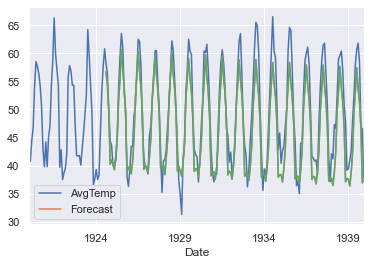

In [61]:
df['Forecast'] = result.predict(start=55,end=240,dynamic=True)
df.plot()
df['Forecast'].plot()
plt.show()

The model is predicting the Air temperature very well....we cann see the green line. 
So, now using model to predict for 5 years ahead.

In [62]:
df.tail(1)

,AvgTemp,Forecast
Date,,
1939-12-01,37.8,37.464636


In [64]:
from pandas.tseries.offsets import DateOffset

In [69]:
future_date = [df.index[-1] + DateOffset(months=x) for x in range (0,61)]
future_date_df = pd.DataFrame(index=future_date[0:],columns=df.columns)
future_date_df

,AvgTemp,Forecast
1939-12-01,NaN,NaN
1940-01-01,NaN,NaN
1940-02-01,NaN,NaN
1940-03-01,NaN,NaN
1940-04-01,NaN,NaN
...,...,...
1944-08-01,NaN,NaN
1944-09-01,NaN,NaN
1944-10-01,NaN,NaN
1944-11-01,NaN,NaN


In [70]:
all_dates = pd.concat([df,future_date_df])
all_dates.head(1)

,AvgTemp,Forecast
1920-01-01,40.6,NaN


In [72]:
print(len(df),len(future_date))

240 61


[]

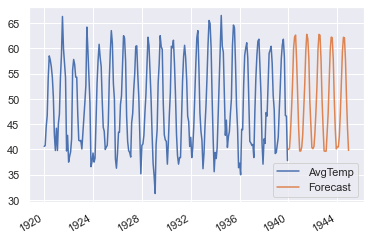

In [76]:
all_dates['Forecast'] = result.predict(start=240,end=301,dynamic=True)
all_dates[['AvgTemp','Forecast']].plot()
plt.plot()

In [77]:
all_dates.to_csv("Air Temperature.csv")

# DONE